# STOCK PRICE PREDICTION OF RELIANCE COMPANY(1 yr rel_1yr)

In [1]:
#IMPORTING ALL REQUIRED PACKAGES
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pylab import rcParams
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import matplotlib.ticker as ticker

In [2]:
rel_1yr=pd.read_csv('rel_1.csv')
rel_1yr

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-30,1038.071655,1063.876099,1010.385193,1022.618774,1018.794067,1491353.0
1,2020-03-31,1060.904419,1118.357666,1038.913696,1101.963745,1097.842285,2139567.0
2,2020-04-01,1105.678345,1114.345825,1034.901855,1070.463501,1066.459839,833265.0
3,2020-04-03,1119.348267,1120.933228,1047.036377,1068.036621,1064.041992,1487426.0
4,2020-04-07,1095.574463,1202.259277,1090.621704,1195.028076,1190.558472,1258845.0
...,...,...,...,...,...,...,...
244,2021-03-22,2075.000000,2075.000000,2033.900024,2061.850098,2061.850098,317137.0
245,2021-03-23,2064.000000,2109.899902,2057.250000,2089.050049,2089.050049,578793.0
246,2021-03-24,2080.550049,2080.550049,2040.800049,2047.300049,2047.300049,307569.0
247,2021-03-25,2050.550049,2057.550049,1985.000000,1992.750000,1992.750000,309621.0


# EXPLORATORY rel_1yr ANALYSIS(EDA)

In [3]:
#CHECKING SHAPE OF rel_1yrSET
rel_1yr.shape

(249, 7)

In [4]:
#CHECKING NULL VALUES IN rel_1yrSET
rel_1yr.isnull().sum()

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [5]:
rel_1yr[rel_1yr.isna().any(axis=1)]

,Date,Open,High,Low,Close,Adj Close,Volume
158,2020-11-14,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#SINCE THE rel_1yrSET HAD NULL VALUES, WE REMOVE IT USING DROPNA() 
rell_1yr=rel_1yr.dropna()
rell_1yr

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-30,1038.071655,1063.876099,1010.385193,1022.618774,1018.794067,1491353.0
1,2020-03-31,1060.904419,1118.357666,1038.913696,1101.963745,1097.842285,2139567.0
2,2020-04-01,1105.678345,1114.345825,1034.901855,1070.463501,1066.459839,833265.0
3,2020-04-03,1119.348267,1120.933228,1047.036377,1068.036621,1064.041992,1487426.0
4,2020-04-07,1095.574463,1202.259277,1090.621704,1195.028076,1190.558472,1258845.0
...,...,...,...,...,...,...,...
244,2021-03-22,2075.000000,2075.000000,2033.900024,2061.850098,2061.850098,317137.0
245,2021-03-23,2064.000000,2109.899902,2057.250000,2089.050049,2089.050049,578793.0
246,2021-03-24,2080.550049,2080.550049,2040.800049,2047.300049,2047.300049,307569.0
247,2021-03-25,2050.550049,2057.550049,1985.000000,1992.750000,1992.750000,309621.0


In [7]:
rell_1yr.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
#DESCIPTION OF rel_1yrSET
rell_1yr.describe()

,Open,High,Low,Close,Adj Close,Volume
count,248.000000,248.000000,248.000000,248.000000,248.000000,2.480000e+02
mean,1906.171103,1931.924084,1875.680561,1902.123390,1900.763211,8.569024e+05
std,298.879606,296.386990,296.190319,294.737693,296.700465,5.651724e+05
min,1038.071655,1063.876099,1010.385193,1022.618774,1018.794067,1.577130e+05
25%,1769.787537,1791.750031,1734.737488,1760.287537,1758.642334,4.434232e+05
50%,1988.150024,2010.000000,1966.825012,1988.199951,1988.199951,6.970335e+05
75%,2109.000000,2132.937439,2075.512512,2106.412475,2106.412475,1.103818e+06
max,2323.699951,2368.800049,2311.750000,2323.850098,2323.850098,2.929255e+06


In [9]:
#INFORMATION ABOUT rel_1yrSET
rell_1yr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248 entries, 0 to 248
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       248 non-null    object 
 1   Open       248 non-null    float64
 2   High       248 non-null    float64
 3   Low        248 non-null    float64
 4   Close      248 non-null    float64
 5   Adj Close  248 non-null    float64
 6   Volume     248 non-null    float64
dtypes: float64(6), object(1)
memory usage: 15.5+ KB


In [10]:
relll_1yr = rell_1yr.groupby('Date')[['Close']].mean()


In [11]:
relll_1yr

,Close
Date,
2020-03-30,1022.618774
2020-03-31,1101.963745
2020-04-01,1070.463501
2020-04-03,1068.036621
2020-04-07,1195.028076
...,...
2021-03-22,2061.850098
2021-03-23,2089.050049
2021-03-24,2047.300049


In [12]:
type(rell_1yr.Date[0])

str

In [13]:
rell_1yr['Date'] = pd.to_datetime(rell_1yr['Date'], format='%Y-%m-%d')

In [14]:
type(rell_1yr.Date[0])

pandas._libs.tslibs.timestamps.Timestamp

# VISUALIZATION OF rel_1yrSET

Text(0, 0.5, 'Price')

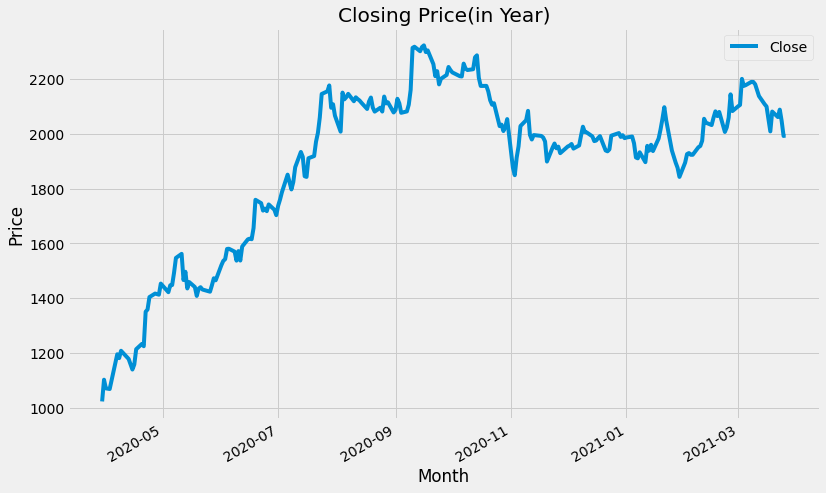

In [15]:
#plotting the graph with date againts closing price(in month)
rell_1yr.plot(figsize=(12,8),x='Date',y='Close',title='Closing Price(in Year)',fontsize=14)
plt.xlabel("Month")
plt.ylabel("Price")

In [16]:
relll_1yr

,Close
Date,
2020-03-30,1022.618774
2020-03-31,1101.963745
2020-04-01,1070.463501
2020-04-03,1068.036621
2020-04-07,1195.028076
...,...
2021-03-22,2061.850098
2021-03-23,2089.050049
2021-03-24,2047.300049


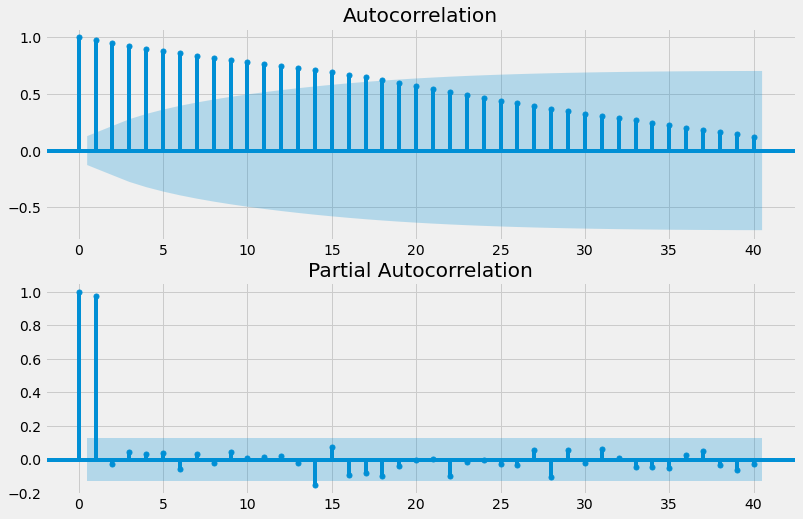

In [17]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(relll_1yr['Close'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(relll_1yr['Close'].iloc[13:],lags=40,ax=ax2)

# DICKEY FULLER TEST(For checking stationarity)

In [18]:
test_result=adfuller(relll_1yr['Close'])
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. rel_1yr has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [19]:
relll_1yr['Close First Difference'] = relll_1yr['Close'] - relll_1yr['Close'].shift(1)
relll_1yr['Close'].shift(1)


Date
2020-03-30            NaN
2020-03-31    1022.618774
2020-04-01    1101.963745
2020-04-03    1070.463501
2020-04-07    1068.036621
                 ...     
2021-03-22    2081.899902
2021-03-23    2061.850098
2021-03-24    2089.050049
2021-03-25    2047.300049
2021-03-26    1992.750000
Name: Close, Length: 248, dtype: float64

ADF Test Statistic : -15.551225506335927
p-value : 2.0988005669036163e-28
#Lags Used : 0
Number of Observations Used : 246
strong evidence against the null hypothesis(Ho), reject the null hypothesis. rel_1yr has no unit root and is stationary


Text(0, 0.5, 'Price')

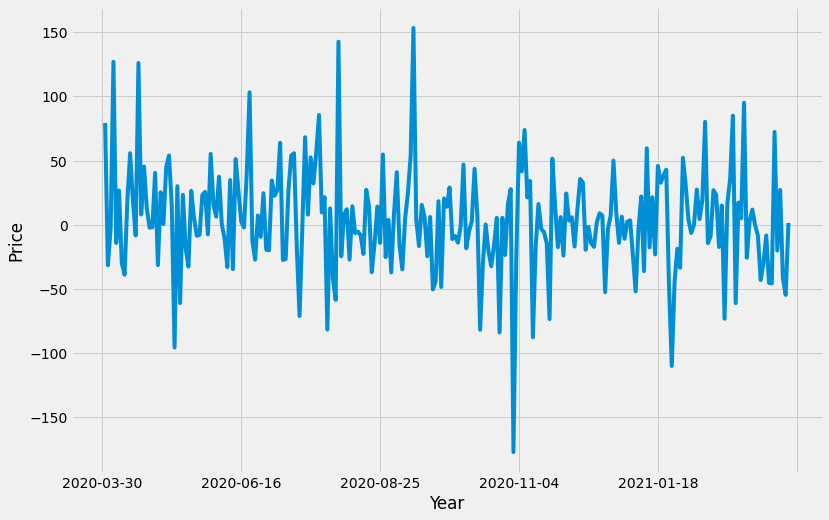

In [20]:
adfuller_test(relll_1yr['Close First Difference'].dropna())
relll_1yr['Close First Difference'].plot(figsize=(12,8))
plt.xlabel("Year")
plt.ylabel("Price")

In [21]:
stepwise_fit = auto_arima(relll_1yr['Close'], trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=2536.427, Time=0.33 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=2691.027, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=2629.298, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=2531.049, Time=0.06 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=2533.049, Time=0.12 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=2533.049, Time=0.11 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=inf, Time=0.36 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0]          
Total fit time: 1.301 seconds


In [22]:
train_rel_1yr, test_rel_1yr = relll_1yr[0:int(len(relll_1yr)*0.7)], relll_1yr[int(len(relll_1yr)*0.7):]
training_rel_1yr = train_rel_1yr['Close'].values
test_rel_1yr = test_rel_1yr['Close'].values
history = [x for x in training_rel_1yr]
model_predictions = []
N_test_observations = len(test_rel_1yr)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(0,2,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_rel_1yr[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_rel_1yr, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))



Testing Mean Squared Error is 1417.5685264486624


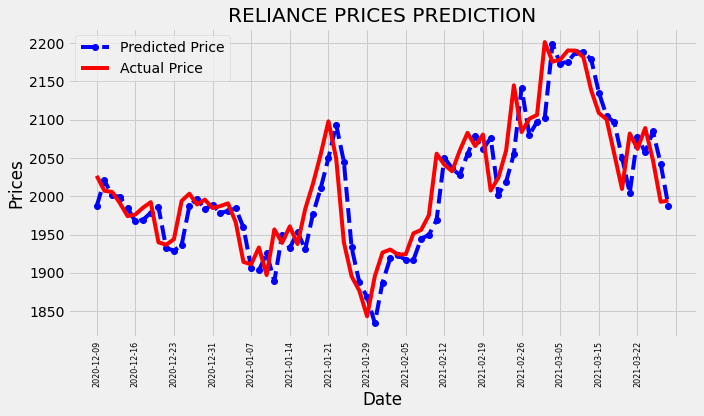

In [23]:
test_set_range = relll_1yr[int(len(relll_1yr)*0.7):].index
ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_rel_1yr, color='red', label='Actual Price')
plt.title('RELIANCE PRICES PREDICTION')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.xticks(rotation=90)
plt.tick_params(axis='x' ,labelsize=8)
# plt.xticks(np.arange(881,1259,50), relll_1yr.Date[881:1259:50])
plt.legend()
plt.tight_layout()
plt.show()

In [24]:
pred=model_fit.predict(start=len(relll_1yr),end=len(relll_1yr)+30,typ='levels')
print(pred)

[1987.20114955 1981.57383899 1975.86806829 1970.08383748 1964.22114654
 1958.27999547 1952.26038429 1946.16231298 1939.98578154 1933.73078998
 1927.3973383  1920.9854265  1914.49505457 1907.92622251 1901.27893034
 1894.55317804 1887.74896561 1880.86629307 1873.9051604  1866.8655676
 1859.74751468 1852.55100164 1845.27602848 1837.92259519 1830.49070177
 1822.98034824 1815.39153458 1807.72426079 1799.97852689 1792.15433286
 1784.2516787  1776.27056442]


In [25]:
# model performance
mse = mean_squared_error(test_rel_1yr, model_predictions)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_rel_1yr,model_predictions)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_rel_1yr, model_predictions))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(model_predictions - test_rel_1yr)/np.abs(test_rel_1yr))
print('MAPE: '+str(mape))

MSE: 1417.5685264486624
MAE: 28.950642685626747
RMSE: 37.65061123605648
MAPE: 0.046103504715445665
